In [2]:
import numpy as np
import scipy
import time

In [3]:
n = 5000
show_info = False
t = 10

In [4]:
from scipy.sparse import csr_matrix

In [5]:
from scipy.sparse import linalg

In [6]:
C = scipy.sparse.random(n, n, density=0.02, format='coo', dtype=np.float16)
A = scipy.sparse.identity(n, np.float16, format='coo') - C
#A = scipy.sparse.csr_array(A)
B = np.random.rand(n)

Approach 1: use implemented option

In [12]:
tries = []
errors = []
for i in range(t):
    start_time = time.time()
    X = scipy.sparse.linalg.spsolve(A, B)
    end_time = time.time()
    errors.append(B - A @ X)
    tries.append(end_time - start_time)
mean_time1 = np.mean(tries)
error1 = np.max(errors)
print('mean time:', mean_time1)
print('max max error:', error1)

mean time: 23.094774460792543
max max error: 4.506595097097943e-11


#Approach 2: use iterative Least Squares

In [13]:
tries = []
errors = []
for i in range(t):
    start_time = time.time()
    X = scipy.sparse.linalg.lsmr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    end_time = time.time()
    errors.append(B - A @ X[0])
    tries.append(end_time - start_time)
mean_time2 = np.mean(tries)
error2 = np.max(errors)
print('mean time:', mean_time2)
print('max max error:', error2)

mean time: 6.150711131095886
max max error: 0.0394107015329449


Approach 3: Use Least Squares

In [14]:
tries = []
errors = []
for i in range(t):
    start_time = time.time()
    X = scipy.sparse.linalg.lsqr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    end_time = time.time()
    errors.append(B - A @ X[0])
    tries.append(end_time - start_time)
mean_time3 = np.mean(tries)
error3 = np.max(errors)
print('mean time:', mean_time3)
print('max max error:', error3)

mean time: 7.804008913040161
max max error: 0.033859231310702564


In [30]:
dim_range = [1000*i for i in range(1, 6)]
time_range_first = []
time_range_second = []
time_range_third = []
for n in dim_range:
    print("Dimension = {}".format(n))
    C = scipy.sparse.random(n, n, density=0.02, format='coo', dtype=np.float16)
    A = scipy.sparse.identity(n, np.float16, format='coo') - C
    B = np.random.rand(n)

    t = %timeit -o -q scipy.sparse.linalg.spsolve(A, B)
    time_range_first.append(t.best)
    t = %timeit -o -q scipy.sparse.linalg.lsmr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    time_range_second.append(t.best)
    t = %timeit -o -q scipy.sparse.linalg.lsqr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    time_range_third.append(t.best)

Dimension = 1000
Dimension = 2000
Dimension = 3000
Dimension = 4000
Dimension = 5000


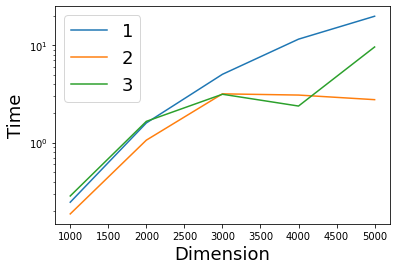

In [31]:
plt.plot(dim_range, time_range_first, label="1")
plt.plot(dim_range, time_range_second, label="2")
plt.plot(dim_range, time_range_third, label="3")
plt.legend(fontsize=18)
plt.xlabel("Dimension of matrix", fontsize=18)
plt.ylabel("Time", fontsize=18)
plt.yscale("log")

In [33]:
dim_range = [100*i for i in range(1, 11)]
time_range_first = []
time_range_second = []
time_range_third = []
for n in dim_range:
    print("Dimension = {}".format(n))
    C = scipy.sparse.random(n, n, density=0.02, format='coo', dtype=np.float16)
    A = scipy.sparse.identity(n, np.float16, format='coo') - C
    B = np.random.rand(n)

    t = %timeit -o -q scipy.sparse.linalg.spsolve(A, B)
    time_range_first.append(t.best)
    t = %timeit -o -q scipy.sparse.linalg.lsmr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    time_range_second.append(t.best)
    t = %timeit -o -q scipy.sparse.linalg.lsqr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    time_range_third.append(t.best)

Dimension = 100
Dimension = 200
Dimension = 300
Dimension = 400
Dimension = 500
Dimension = 600
Dimension = 700
Dimension = 800
Dimension = 900
Dimension = 1000


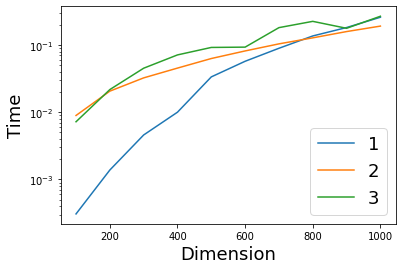

In [34]:
plt.plot(dim_range, time_range_first, label="1")
plt.plot(dim_range, time_range_second, label="2")
plt.plot(dim_range, time_range_third, label="3")
plt.legend(fontsize=18)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Time", fontsize=18)
plt.yscale("log")

In [35]:
dim_range = [10*i for i in range(1, 11)]
time_range_first = []
time_range_second = []
time_range_third = []
for n in dim_range:
    print("Dimension = {}".format(n))
    C = scipy.sparse.random(n, n, density=0.02, format='coo', dtype=np.float16)
    A = scipy.sparse.identity(n, np.float16, format='coo') - C
    B = np.random.rand(n)

    t = %timeit -o -q scipy.sparse.linalg.spsolve(A, B)
    time_range_first.append(t.best)
    t = %timeit -o -q scipy.sparse.linalg.lsmr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    time_range_second.append(t.best)
    t = %timeit -o -q scipy.sparse.linalg.lsqr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    time_range_third.append(t.best)

Dimension = 10
Dimension = 20
Dimension = 30
Dimension = 40
Dimension = 50
Dimension = 60
Dimension = 70
Dimension = 80
Dimension = 90
Dimension = 100


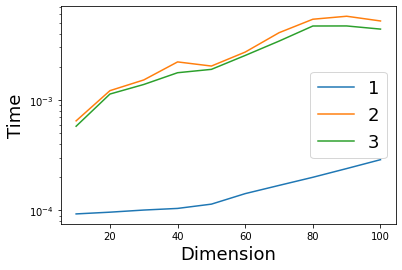

In [36]:
plt.plot(dim_range, time_range_first, label="1")
plt.plot(dim_range, time_range_second, label="2")
plt.plot(dim_range, time_range_third, label="3")
plt.legend(fontsize=18)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Time", fontsize=18)
plt.yscale("log")

In [38]:
dim_range = [10**i for i in range(1, 5)]
time_range_first = []
time_range_second = []
time_range_third = []
for n in dim_range:
    print("Dimension = {}".format(n))
    C = scipy.sparse.random(n, n, density=0.02, format='coo', dtype=np.float16)
    A = scipy.sparse.identity(n, np.float16, format='coo') - C
    B = np.random.rand(n)

    t = %timeit -o -q scipy.sparse.linalg.spsolve(A, B)
    time_range_first.append(t.best)
    t = %timeit -o -q scipy.sparse.linalg.lsmr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    time_range_second.append(t.best)
    t = %timeit -o -q scipy.sparse.linalg.lsqr(A, B, atol=1e-05, btol=1e-05, show=show_info, x0=None)
    time_range_third.append(t.best)

Dimension = 10
Dimension = 100
Dimension = 1000
Dimension = 10000


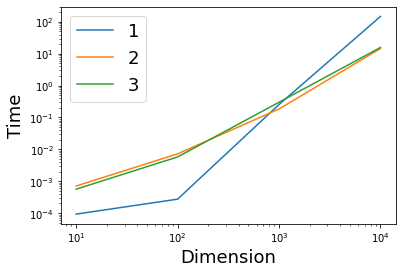

In [43]:
plt.plot(dim_range, time_range_first, label="1")
plt.plot(dim_range, time_range_second, label="2")
plt.plot(dim_range, time_range_third, label="3")
plt.legend(fontsize=18)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Time", fontsize=18)
plt.xscale("log")
plt.yscale("log")